# Chargement des données :

Pour le projet **DeepLearning**, On classifie des affiches de films associées aux 9 labels suivants : **crime**, **documentary**, **family**, **history**, **horror**, **romance**, **science-fiction**, **war**, **western**.

Les images sont dans le dossier **bdd** répartit en 3 dossiers: *train*, *validation* et *test*. Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes. L'arborescence est disponible sur le [github du projet](https://github.com/GeogeoB/DeepLearning).

Nous pouvons donc faire **git clone** pour récupérer le projet et la base de données.

In [45]:
!git clone https://github.com/GeogeoB/DeepLearning
path = "./DeepLearning/bdd/"

fatal: destination path 'DeepLearning' already exists and is not an empty directory.


Fonction pour charger les images dans une matrice X et les classes associées dans une matrice y.

In [46]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=(64,64)):
    image_sizeY = image_size[0]
    image_sizeX = image_size[1]
  
    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_sizeY, image_sizeX, 3), dtype=np.uint8)
    y = np.zeros((num_images, ), dtype=np.uint8)
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_sizeX,image_sizeY))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

Création des 3 matrices (X,y) associées aux 3 groupes *train*, *eval* et *test*.

In [47]:
LABELS = ['crime', 'documentary', 'family', 'history', 'horror', 'romance', 'science-fiction', 'war', "western"]
NCLASS = len(LABELS)
IMAGE_SIZE = (345,230) # 345 pixel de haut, 230 de large

x_train, y_train = load_data(path, LABELS, dataset='Apprentissage', image_size=IMAGE_SIZE)
print("Taille X_train:", x_train.shape, "Taille y_train:", y_train.shape)

x_val, y_val = load_data(path, LABELS, dataset='Evaluation', image_size=IMAGE_SIZE)
print("Taille X_val:  ", x_val.shape, " Taille y_val:  ", y_val.shape)

x_test, y_test = load_data(path, LABELS, dataset='Test', image_size=IMAGE_SIZE)
print("Taille X_test: ", x_test.shape, " Taille y_test: ", y_test.shape)

Taille X_train: (2207, 345, 230, 3) Taille y_train: (2207,)
Taille X_val:   (264, 345, 230, 3)  Taille y_val:   (264,)
Taille X_test:  (264, 345, 230, 3)  Taille y_test:  (264,)


Afficher une image pour chacun des genres:

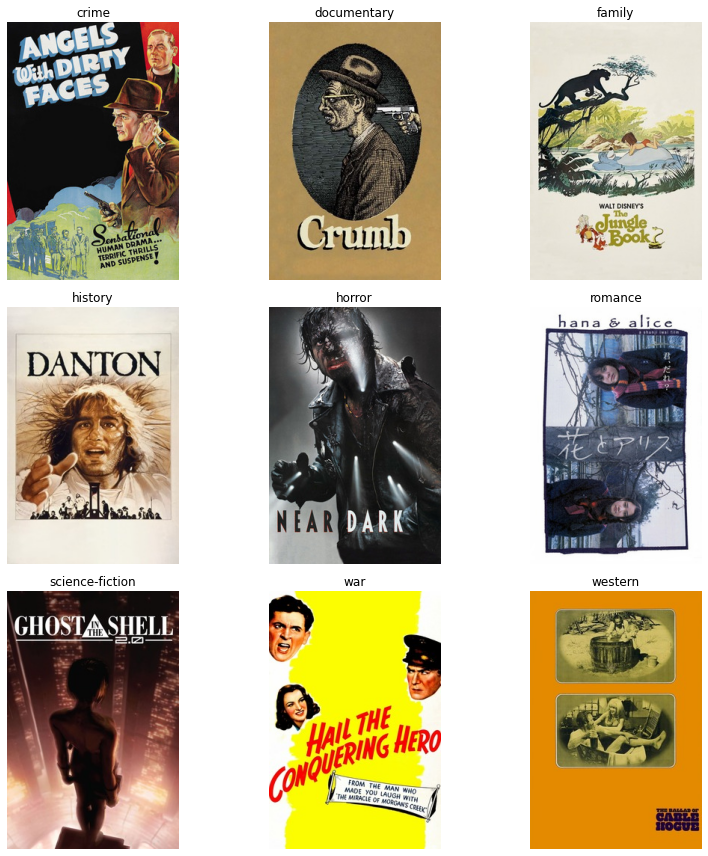

In [48]:
import matplotlib.pyplot as plt
import random

# Dictionnaire pour associer chaque genre les indices dans x_train et y_train
genresIndices = {i: [] for i in range(NCLASS)}
for i, val in enumerate(y_train):
    genresIndices[val].append(i)

plt.figure(figsize=(12, 12))
random_indices = [random.choice(genresIndices[val]) for val in range(NCLASS)]
for i in range(0, NCLASS):
    plt.subplot(3, 3, i+1)
    # Enlever les axes
    plt.axis("off")
    image = x_train[random_indices[i]]
    plt.title(LABELS[y_train[random_indices[i]]])
    plt.imshow(image)

plt.tight_layout()
plt.show()